In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.data.shape, cancer.feature_names

((569, 30),
 array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension'], dtype='<U23'))

In [5]:
data = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data, cancer.target, random_state=2022, test_size=0.2, stratify=cancer.target)
# train, test set 을 나눌 때 target의 비율을 맞추는 옵션, stratify(층하추출)

### Correlation between models

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [7]:
clfs = []
LR=LogisticRegression(random_state=2022); clfs.append(LR)
DT=DecisionTreeClassifier(random_state=2022); clfs.append(DT)
MLP=MLPClassifier(random_state=2022); clfs.append(MLP)
KNN=KNeighborsClassifier(); clfs.append(KNN)
RF=RandomForestClassifier(random_state=2022); clfs.append(RF)
GBM=GradientBoostingClassifier(random_state=2022); clfs.append(GBM)

LogisticRegression             0.9473684210526315
DecisionTreeClassifier         0.9912280701754386
MLPClassifier                  0.9035087719298246
KNeighborsClassifier           0.9298245614035088
RandomForestClassifier         1.0
GradientBoostingClassifier     0.9912280701754386


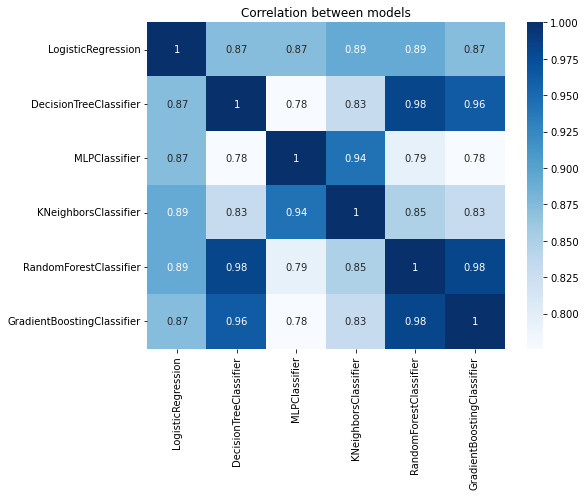

In [10]:
pred_results = []
for clf in clfs :
    pred = clf.fit(X_train, y_train).predict(X_test)
    name = type(clf).__name__
    pred_results.append(pd.Series(pred, name=name))
    print("{:30s} {}".format(name, accuracy_score(y_test, pred)))

ensemble_results = pd.concat(pred_results, axis=1)
plt.figure(figsize = (8,6))
g = sns.heatmap(ensemble_results.corr(),annot=True, cmap='Blues')
g.set_title("Correlation between models")
plt.show()

# 모든 모델을 앙상블하거나,
# 가장 성능이 높은 모델을 기준으로, 상관관계가 낮은 모델을 앙상블 하거나
# = RF, MLP, KNN
# 가장 성능이 높은 모델과 비슷한 성능을 내는 모델과 낮은 상관관계 모델을 앙상블
# = GBM, MLP, KN 

In [25]:
ensemble_results

,LogisticRegression,DecisionTreeClassifier,MLPClassifier,KNeighborsClassifier,RandomForestClassifier,GradientBoostingClassifier
0,0,0,0,0,0,0
1,1,1,1,1,1,1
2,0,0,0,0,0,0
3,1,1,1,1,1,1
4,0,0,0,0,0,0
...,...,...,...,...,...,...
109,0,0,0,0,0,0
110,0,0,1,1,0,0
111,0,0,0,0,0,0
112,1,1,1,1,1,1


### Voting ensemble
평가지표가 accuracy, recall, precision인 경우

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

lr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()

lr.fit(X_train, y_train)
knn.fit(X_train, y_train)
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
lr.coef_ # 로지스틱의 계수추출
pd.Series(lr.coef_[0], index=X_train.columns).sort_values() # 계수 추출 후 시리즈로 만듦
# 데이터의 스케일을 맞추지 않았기 때문에, 그대로 받아들이기보단 방향성 정도만 파악하는 것이 좋음

worst perimeter           -0.331990
worst texture             -0.225348
worst concavity           -0.179956
worst compactness         -0.137769
area error                -0.080798
mean concavity            -0.061574
worst concave points      -0.053813
mean compactness          -0.041593
worst symmetry            -0.034635
mean concave points       -0.025640
perimeter error           -0.020140
mean area                 -0.019669
concavity error           -0.014494
worst smoothness          -0.014149
worst fractal dimension   -0.012207
worst area                -0.011620
compactness error         -0.009584
mean symmetry             -0.008053
mean smoothness           -0.006736
concave points error      -0.003919
symmetry error            -0.002067
mean fractal dimension    -0.001504
fractal dimension error   -0.000984
smoothness error          -0.000762
radius error               0.012175
mean texture               0.084617
texture error              0.104305
worst radius               0

In [30]:
# 변수중요도 파악
pd.Series(dt.feature_importances_, index=X_train.columns).sort_values()

mean radius                0.000000
worst symmetry             0.000000
concave points error       0.000000
fractal dimension error    0.000000
texture error              0.000000
radius error               0.000000
mean fractal dimension     0.000000
compactness error          0.000000
mean symmetry              0.000000
worst perimeter            0.000000
mean compactness           0.000000
mean smoothness            0.000000
worst smoothness           0.000000
mean perimeter             0.000000
worst concavity            0.000000
mean concave points        0.000000
concavity error            0.000000
smoothness error           0.001232
worst radius               0.004384
worst fractal dimension    0.004696
symmetry error             0.006915
worst compactness          0.007826
perimeter error            0.009010
area error                 0.014118
mean area                  0.015652
mean concavity             0.029274
mean texture               0.033391
worst texture              0

In [32]:
# Hard Voting 
# Scartch Code
((lr.predict(X_test) + dt.predict(X_test) + knn.predict(X_test)) >= 2).astype('int') #2 이상이면 1, 아니면 0

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1])

In [33]:
# Soft Voting 
# Scratch Code
(lr.predict_proba(X_test)[:,1] + dt.predict_proba(X_test)[:,1] + knn.predict_proba(X_test)[:,1])/3 #1 일 때의 확률값

array([1.91644696e-17, 9.97398547e-01, 3.16562828e-08, 9.96353900e-01,
       1.81872262e-09, 3.53008960e-13, 9.80444605e-01, 9.98827936e-01,
       9.92097040e-01, 9.98902507e-01, 4.57604702e-04, 8.52036894e-01,
       1.66216717e-09, 8.77319191e-01, 7.99409448e-01, 1.05553081e-06,
       1.58066097e-10, 9.78055665e-01, 9.99740998e-01, 9.98523591e-01,
       9.89332936e-01, 1.47130000e-05, 9.98480608e-01, 9.97424256e-01,
       6.97283773e-01, 9.93581328e-01, 9.27544162e-01, 9.99867619e-01,
       9.06906188e-01, 4.69598772e-01, 9.98310331e-01, 3.53686476e-03,
       1.42464035e-10, 1.58164847e-05, 5.39883979e-01, 3.28452972e-04,
       3.42985290e-04, 9.31822374e-01, 9.98532021e-01, 9.98544276e-01,
       9.96281902e-01, 9.96272050e-01, 1.09936642e-01, 1.67703902e-04,
       9.90380458e-01, 1.75398383e-03, 6.51991715e-01, 2.85648570e-06,
       9.98837153e-01, 9.99774835e-01, 1.06340519e-06, 7.92021788e-02,
       9.89272096e-01, 9.99706571e-01, 9.82750763e-01, 9.79147938e-01,
      

In [34]:
from sklearn.ensemble import VotingClassifier
models = [('LR',lr),
         ('DT',dt),
         ('KNN',knn)] #모델을 튜플형태로 리스트로 저장
hard_vot = VotingClassifier(estimators=models, voting='hard')
soft_vot = VotingClassifier(estimators=models, voting='soft')

hard_vot.fit(X_train, y_train)
soft_vot.fit(X_train, y_train)

VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('DT', DecisionTreeClassifier()),
                             ('KNN', KNeighborsClassifier())],
                 voting='soft')

#### Other Methods

In [35]:
# 위에서 평가한 모든 모델을 앙상블할 경우
voting = VotingClassifier(
    estimators = [(type(clf).__name__, clf) for clf in clfs], voting='hard')
voting.fit(X_train, y_train).score(X_test, y_test)

0.9736842105263158

In [36]:
# 가장 성능이 높은 GBM과 낮은 상관관계가 있는 모델끼리만 앙상블할 경우
voting = VotingClassifier(
    estimators = [('gbm', GBM), ('mlp', MLP), ('dt', DT)], voting='hard')
voting.fit(X_train, y_train).score(X_test, y_test)

1.0

In [37]:
# GBM과 성능이 비슷한 LR과 낮은 상관관계가 있는 모델끼리만 앙상블할 경우
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(
    estimators = [('lr', LR), ('dt', DT), ('knn', KNN)], voting='hard')
voting.fit(X_train, y_train).score(X_test, y_test)

0.9649122807017544

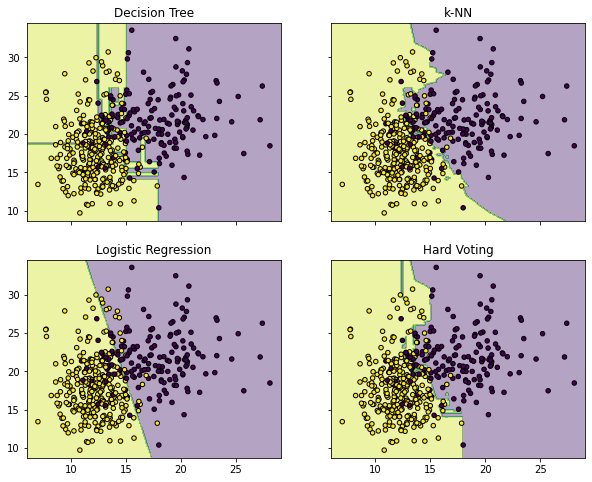

In [42]:
from itertools import product

X = X_train.iloc[:, [0, 1]]
y = y_train

DT.fit(X, y)
KNN.fit(X, y)
LR.fit(X, y)
voting.fit(X, y)

# Plotting decision regions
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))
for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [DT, KNN, LR, voting],
                        ['Decision Tree', 'k-NN', 'Logistic Regression', 'Hard Voting']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)
plt.show()

### Averaging predictions
평가지표가 roc-auc, logloss 등일 경우

In [43]:
# Arithmetic mean
averaging = VotingClassifier(
    estimators = [('lr', LR), ('dt', DT), ('knn', KNN)], voting='soft')
averaging.fit(X_train, y_train)

print('AUC =', roc_auc_score(y_test, averaging.predict_proba(X_test)[:,1]))

AUC = 0.9983465608465609


In [44]:
# Geometic mean
from scipy.stats.mstats import gmean

pred_logreg = LR.fit(X_train, y_train).predict_proba(X_test)[:,1]
pred_tree = DT.fit(X_train, y_train).predict_proba(X_test)[:,1]
pred_knn = KNN.fit(X_train, y_train).predict_proba(X_test)[:,1]

print('AUC = ', roc_auc_score(y_test, gmean([pred_logreg, pred_tree, pred_knn], axis=0)))

AUC =  0.9861111111111112


In [46]:
# Power mean

* 이 셀에서 실행 금지 *

# 다수의 DNN 모형에서 생성된 예측값을 Power Mean 

p = 0 # 이 값에 따라 성능이 달라짐 (p=0: 기하평균, p=1: 산술평균)    
if nf >= 2:
    if p == 0: 
        pred = 1
        for j in range(nf): pred = pred * slist.iloc[:,j+1]
        pred = pred**(1/nf)
    else:
        pred = 0
        for j in range(nf): pred = pred + slist.iloc[:,j+1]**p
        pred = pred / nf
        pred = pred**(1/p)
    submission = pd.DataFrame({'item_id': slist.item_id, 'item_cnt_month': pred})
    t = pd.Timestamp.now()
    fname = f"p{p}mean_submission_{t.month:02}{t.day:02}_{t.hour:02}{t.minute:02}.csv"
    submission.to_csv(fname, index=False)

In [12]:
# ROC_AUC score를 통한 성능 측정 
# accuracy score 로는 balance가 맞지 않기 때문에 측정하기 쉽지 않음
from sklearn.metrics import roc_auc_score

my_models = [lr, dt, knn, hard_vot, soft_vot]
for m in my_models:
    try:
        pred = m.predict_proba(x_test)[:,1]
    except:
        pred = m.predict(x_test)
    name= m.__class__.__name__
    score = roc_auc_score(y_test, pred)
    print('{0} ROC-AUC SCORE: {1:.4f}'.format(name,score))
# .4f = 소수점 4자리까지 출력
# hard voting은 class를 결정하는 것이기 때문에 확률값이 나오지 않으므로 proba 불가능
# try-except 를 통해서 오류가 발생할 경우, predict 진행하도록 코딩

LogisticRegression ROC-AUC SCORE: 0.6728
DecisionTreeClassifier ROC-AUC SCORE: 0.6580
KNeighborsClassifier ROC-AUC SCORE: 0.5323
VotingClassifier ROC-AUC SCORE: 0.5379
VotingClassifier ROC-AUC SCORE: 0.7011


### Stacking

In [48]:
#!pip install vecstack

  Using cached vecstack-0.4.0.tar.gz (18 kB)
  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19877 sha256=555108ab300ec16c0c32672ab06fc4583c592c4d94463ec025be316064015573
  Stored in directory: c:\users\lucky\appdata\local\pip\cache\wheels\7e\ee\d6\47cb94a403bc544de1433986e5530d6b0498021098fbe43aa1
Successfully built vecstack


In [49]:
from vecstack import stacking

models = clfs
S_train, S_test = stacking(models,                     # list of models
                           X_train, y_train, X_test,   # data
                           regression=False,           # classification task (if you need 
                                                       #     regression - set to True)
                           needs_proba=False,          # predict class labels (if you need 
                                                       #     probabilities - set to True) 
                           metric=accuracy_score,      # metric: callable
                           n_folds=5,                  # number of folds
                           stratified=True,            # stratified split for folds
                           shuffle=True,               # shuffle the data
                           random_state=2022,             # ensure reproducibility
                           verbose=2)                  # print all info
meta_model = GBM.fit(S_train, y_train)
accuracy_score(y_test, meta_model.predict(S_test))

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [6]

model  0:     [LogisticRegression]
    fold  0:  [0.95604396]
    fold  1:  [0.93406593]
    fold  2:  [0.95604396]
    fold  3:  [0.92307692]
    fold  4:  [0.94505495]
    ----
    MEAN:     [0.94285714] + [0.01281528]
    FULL:     [0.94285714]

model  1:     [DecisionTreeClassifier]
    fold  0:  [0.90109890]
    fold  1:  [0.90109890]
    fold  2:  [0.95604396]
    fold  3:  [0.92307692]
    fold  4:  [0.91208791]
    ----
    MEAN:     [0.91868132] + [0.02038158]
    FULL:     [0.91868132]

model  2:     [MLPClassifier]
    fold  0:  [0.94505495]
    fold  1:  [0.95604396]
    fold  2:  [0.94505495]
    fold  3:  [0.93406593]
    fold  4:  [0.91208791]
    ----
    MEAN:     [0.93846154] + [0.01490622]
    FULL:     [0.93846154]

model  3:     [KNeighborsClassifier]
    fold  0:  [0.94505495]
    fold  1:  [0.94505495]
    fold  2:  [0.92307692]
    fold

0.9824561403508771

In [54]:
S_train, S_train.shape

(array([[0, 1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1],
        [0, 0, 1, 1, 1, 1],
        ...,
        [0, 0, 0, 1, 0, 0],
        [1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1]]),
 (455, 6))

In [55]:
S_test, S_test.shape

(array([[0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1],
        [1, 0, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 1, 1],
        [0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1],
        [1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1],
        [1, 0, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 1, 0, 0],
        [0, 0, 0, 0,

In [56]:
X_train.shape, S_train.shape, X_test.shape, S_test.shape

((455, 30), (455, 6), (114, 30), (114, 6))

#### 3-layer stacking

In [57]:
# level-1: LR, DT, MLP, KNN, RF, GBM

models = clfs
S_train, S_test = stacking(models,                     # list of models
                           X_train, y_train, X_test,   # data
                           regression=False,           # classification task (if you need 
                                                       #     regression - set to True)
                           needs_proba=True,           # predict class labels (if you need 
                                                       #     probabilities - set to True) 
                           metric=accuracy_score,      # metric: callable
                           n_folds=3,                  # number of folds
                           stratified=True,            # stratified split for folds
                           shuffle=True,               # shuffle the data
                           random_state=0,             # ensure reproducibility
                           verbose=0)                  # print all info

In [58]:
# level-2: LR, DT, KNN
# Level-3: Voting

voting = VotingClassifier(estimators = [('lr', LR), ('dt', DT), ('knn', KNN)], voting='hard')
voting.fit(S_train, y_train).score(S_test, y_test)

0.9736842105263158

#### Using Scikit-learn

In [59]:
from sklearn.ensemble import StackingClassifier

# 2-layer stacking

estimators = [(type(clf).__name__, clf) for clf in clfs]
stk_clf = StackingClassifier(
    estimators=estimators, final_estimator=GBM, cv=5)

stk_clf.fit(X_train, y_train).score(X_test, y_test)

0.956140350877193

In [60]:
# 3-layer stacking (Level-3: Voting)

layer_one_estimators = [(type(clf).__name__, clf) for clf in clfs]
voting = VotingClassifier(estimators = [('lr', LR), ('dt', DT), ('knn', KNN)], voting='hard')
stk_clf = StackingClassifier(estimators=layer_one_estimators, final_estimator=voting, cv=5)

stk_clf.fit(X_train, y_train).score(X_test, y_test)

0.9736842105263158

In [61]:
# 3-layer stacking (Level-3: LR)

layer_one_estimators = [(type(clf).__name__, clf) for clf in clfs]
layer_two_estimators = [('lr', LR), ('dt', DT), ('knn', KNN)]

layer_two = StackingClassifier(estimators=layer_two_estimators, final_estimator=LR)
stk_clf = StackingClassifier(estimators=layer_one_estimators, final_estimator=layer_two, cv=5)

stk_clf.fit(X_train, y_train).score(X_test, y_test)

0.9824561403508771

### Random Forest

In [13]:
# 트리기반 앙상블 모델 'Random Forest'
# 랜덤포레스트는 bagging의 한 기법, 데이터의 일부 변수를 선택해 모델을 여러개 만들어나가는 기법
# bagging 이란 데이터set의 일부를 샘플링해서 여러 개 set을 만들어나가는 기법
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=10)

In [14]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [15]:
models = [('LR',lr),
         ('DT',dt),
         ('RF',rf)] #모델을 튜플형태로 리스트로 저장
         
soft_vot_sum = VotingClassifier(estimators=models, voting='soft')
soft_vot_sum.fit(X_train, y_train)

my_models = [lr, dt, soft_vot, rf, soft_vot_sum]
for m in my_models:
    pred = m.predict_proba(x_test)[:,1]
    name= m.__class__.__name__
    score = roc_auc_score(y_test, pred)
    print('{0} ROC-AUC SCORE: {1:.4f}'.format(name,score))
# knn 성능이 너무 안좋으므로 빼면, 성능이 더 오름

LogisticRegression ROC-AUC SCORE: 0.6728
DecisionTreeClassifier ROC-AUC SCORE: 0.6580
VotingClassifier ROC-AUC SCORE: 0.7011
RandomForestClassifier ROC-AUC SCORE: 0.8532
VotingClassifier ROC-AUC SCORE: 0.8086


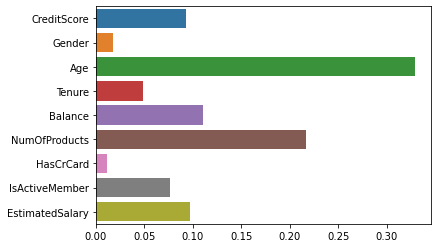

In [16]:
#RandomForest가 설명력은 낮지만, Feature importance는 뽑을 수 있음
sns.barplot(x=rf.feature_importances_, y=X_train.columns)

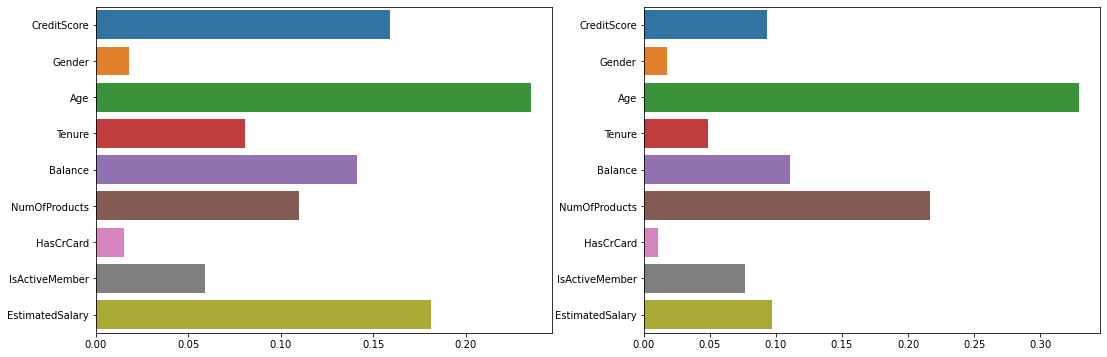

In [17]:
# Decision Tree, RandomForest 의 Feature Importance
fig, ax = plt.subplots(ncols=2, figsize=(18,6));
sns.barplot(x=dt.feature_importances_, y=X_train.columns, ax=ax[0]);
sns.barplot(x=rf.feature_importances_, y=X_train.columns, ax=ax[1]);

### 아다부스팅(AdaBoosting)
- 데이터에서 하나의 모델을 만든 뒤, 못 맞춘 부분에 가중치를 둬서, 맞춘 부분과 함께 두 번째 모델을 만들고, 과정의 반복
- 부스팅을 할 베이스 모델을 지정해줘야함 (base_estimator), prodict_proba를 제공하는 모델만 가능하며 Tree계열이 높은 성능을 보임
- 랜덤포레스트를 사용할 경우 Overfitting 발생, 간단한 모델을 제공하는 것이 좋음
- 모형의 갯수를 많이 쓰면 복잡한 모형이 만들어져서 Over-fitting이 발생할 확률이 높아서 조절해줘야함, 보통 50개 정도
- 학습률(learning_rate)이 크면 클수록 전혀 다른 모델을 만들려고 함 -> 못 맞춘 부분에만 집중해서 전혀 다른 모델을 만들려고 함, 학습률이 높을수록 복잡한 모델이 만들어짐
- 학습률과 n_estimator의 갯수는 trade-off하게 설정해야함

### 그래디언트부스팅(GBM)
- 모델을 점점 더 복잡하게 만들면서, 과적합을 만들어서, 점점 fitting 되게 기울기(오차를 계산하는 식)를 낮춰가는 방식
- 경사하강법에서 사용할 loss function을 지정해줘야함
- 분류문제에선 friedman_mes, 추정문제에선 mae나 mse 사용

### GBM From Scratch

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn import datasets

boston = datasets.load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=2022)

In [3]:
# Build the 1st weak model
weak_1 = DecisionTreeRegressor(max_depth=2, random_state=2).fit(X_train, y_train)
pred = weak_1.predict(X_train)

In [4]:
# Compute residuals
residual = y_train - pred

# Build the 2nd weak model
weak_2 = DecisionTreeRegressor(max_depth=2, random_state=2).fit(X_train, residual)
pred = weak_2.predict(X_train)

In [5]:
# Compute residuals
residual = residual - pred

# Build the 3rd weak model
weak_3 = DecisionTreeRegressor(max_depth=2, random_state=2).fit(X_train, residual)

In [6]:
# Build a strong model with the weak models
pred = weak_1.predict(X_test) + weak_2.predict(X_test) + weak_3.predict(X_test)

# Compute root mean squared error (rmse)
MSE(y_test, pred)**0.5

5.325379961921318

### GBM in Scikit-learn

In [8]:
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=3, random_state=2022, learning_rate=1.0)
gbr.fit(X_train, y_train)
pred = gbr.predict(X_test)

# Compute root mean squared error (rmse)
MSE(y_test, pred)**0.5

5.664267687567031

### AdaBoost in Scikit-learn

In [18]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dt, learning_rate=0.3) #fitting한 모델을 주며, dt가 보통 좋다고 알려져 있음
ada.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.3)

In [19]:
models = [('LR',lr),
         ('DT',dt),
         ('RF',rf),
         ('ADA',ada)] #모델을 튜플형태로 리스트로 저장
soft_vot_sum = VotingClassifier(estimators=models, voting='soft')
soft_vot_sum.fit(X_train, y_train)
my_models = [lr, dt, soft_vot, rf, soft_vot_sum,ada]
for m in my_models:
    pred = m.predict_proba(x_test)[:,1]
    name= m.__class__.__name__
    score = roc_auc_score(y_test, pred)
    print('{0} ROC-AUC SCORE: {1:.4f}'.format(name,score))

LogisticRegression ROC-AUC SCORE: 0.6728
DecisionTreeClassifier ROC-AUC SCORE: 0.6580
VotingClassifier ROC-AUC SCORE: 0.7011
RandomForestClassifier ROC-AUC SCORE: 0.8532
VotingClassifier ROC-AUC SCORE: 0.8043
AdaBoostClassifier ROC-AUC SCORE: 0.6491


In [20]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
gbm.fit(X_train,y_train)

models = [('RF',rf),
         ('GBM',gbm)] #모델을 튜플형태로 리스트로 저장
soft_vot_sum = VotingClassifier(estimators=models, voting='soft')
soft_vot_sum.fit(X_train, y_train)
my_models = [lr, dt, soft_vot, rf, soft_vot_sum,ada,gbm]
for m in my_models:
    pred = m.predict_proba(X_test)[:,1]
    name= m.__class__.__name__
    score = roc_auc_score(y_test, pred)
    print('{0} ROC-AUC SCORE: {1:.4f}'.format(name,score))

LogisticRegression ROC-AUC SCORE: 0.6728
DecisionTreeClassifier ROC-AUC SCORE: 0.6580
VotingClassifier ROC-AUC SCORE: 0.7011
RandomForestClassifier ROC-AUC SCORE: 0.8532
VotingClassifier ROC-AUC SCORE: 0.8605
AdaBoostClassifier ROC-AUC SCORE: 0.6491
GradientBoostingClassifier ROC-AUC SCORE: 0.8605


### XGBoost, LGBM

In [11]:
import xgboost as XGB
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=300, objective='binary:logistic',
                   learning_rate=0.1, max_depth=8)
evals = [(X_test, y_test)] #list 안에 tuble 형태로 성능평가로 사용

In [12]:
# 100 실행 후 개선 되지 않았으면 stop, 개선되면 진행
# Verbose -> 모델을 피팅하면서 결과들을 추출
xgb.fit(X_train, y_train, eval_metric='auc', eval_set=evals, early_stopping_rounds=100, verbose=True) 

[0]	validation_0-auc:0.98677
[1]	validation_0-auc:0.99735
[2]	validation_0-auc:0.99702
[3]	validation_0-auc:0.99669
[4]	validation_0-auc:0.99669
[5]	validation_0-auc:0.99702
[6]	validation_0-auc:0.99669
[7]	validation_0-auc:0.99802
[8]	validation_0-auc:0.99802
[9]	validation_0-auc:0.99802
[10]	validation_0-auc:0.99735
[11]	validation_0-auc:0.99769
[12]	validation_0-auc:0.99802
[13]	validation_0-auc:0.99868
[14]	validation_0-auc:0.99835
[15]	validation_0-auc:0.99868
[16]	validation_0-auc:0.99835
[17]	validation_0-auc:0.99901
[18]	validation_0-auc:0.99934
[19]	validation_0-auc:0.99934
[20]	validation_0-auc:0.99934
[21]	validation_0-auc:0.99934
[22]	validation_0-auc:0.99934
[23]	validation_0-auc:0.99934
[24]	validation_0-auc:0.99934
[25]	validation_0-auc:0.99934
[26]	validation_0-auc:0.99934
[27]	validation_0-auc:0.99934
[28]	validation_0-auc:0.99934
[29]	validation_0-auc:0.99967
[30]	validation_0-auc:0.99967
[31]	validation_0-auc:0.99967
[32]	validation_0-auc:0.99967
[33]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [13]:
from sklearn.metrics import roc_auc_score

pred = xgb.predict_proba(X_test)[:,1]
roc_auc_score(y_test, pred)

1.0

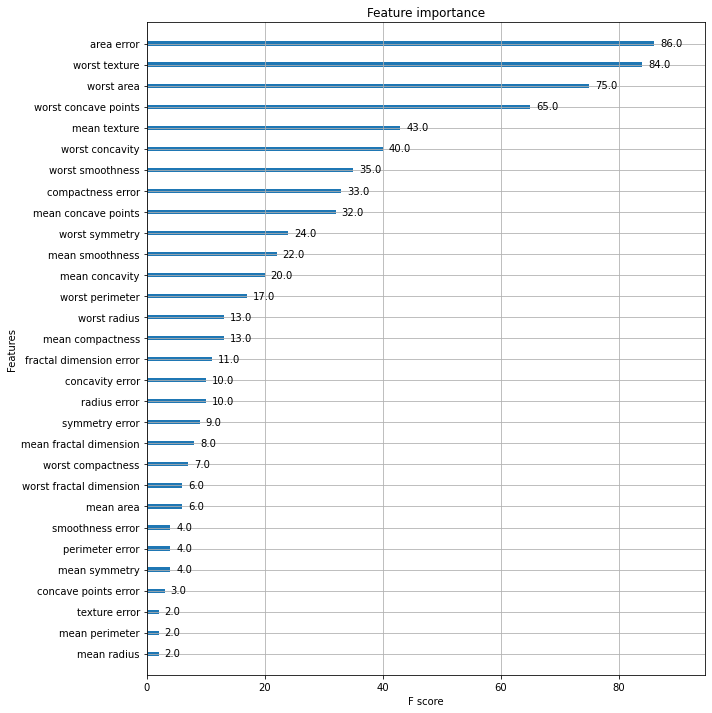

In [14]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb, ax=ax);

In [15]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators=300, objective='binary',learning_rate=0.1,max_depth=8)
lgbm.fit(X_train, y_train, eval_metric='auc', eval_set=evals, early_stopping_rounds=100, verbose=True)

pred = lgbm.predict_proba(X_test)[:,1]
roc_auc_score(y_test,pred)

[1]	valid_0's auc: 0.998016	valid_0's binary_logloss: 0.571392
[2]	valid_0's auc: 0.998347	valid_0's binary_logloss: 0.501168
[3]	valid_0's auc: 0.999669	valid_0's binary_logloss: 0.44504
[4]	valid_0's auc: 0.998347	valid_0's binary_logloss: 0.399662
[5]	valid_0's auc: 0.999339	valid_0's binary_logloss: 0.358234
[6]	valid_0's auc: 0.999008	valid_0's binary_logloss: 0.325106
[7]	valid_0's auc: 0.999339	valid_0's binary_logloss: 0.294531
[8]	valid_0's auc: 0.999339	valid_0's binary_logloss: 0.267798
[9]	valid_0's auc: 0.999339	valid_0's binary_logloss: 0.244597
[10]	valid_0's auc: 0.999339	valid_0's binary_logloss: 0.22279
[11]	valid_0's auc: 0.999339	valid_0's binary_logloss: 0.203871
[12]	valid_0's auc: 0.999339	valid_0's binary_logloss: 0.187425
[13]	valid_0's auc: 0.999339	valid_0's binary_logloss: 0.172089
[14]	valid_0's auc: 0.999339	valid_0's binary_logloss: 0.15886
[15]	valid_0's auc: 0.999339	valid_0's binary_logloss: 0.147492
[16]	valid_0's auc: 0.999339	valid_0's binary_loglos

1.0

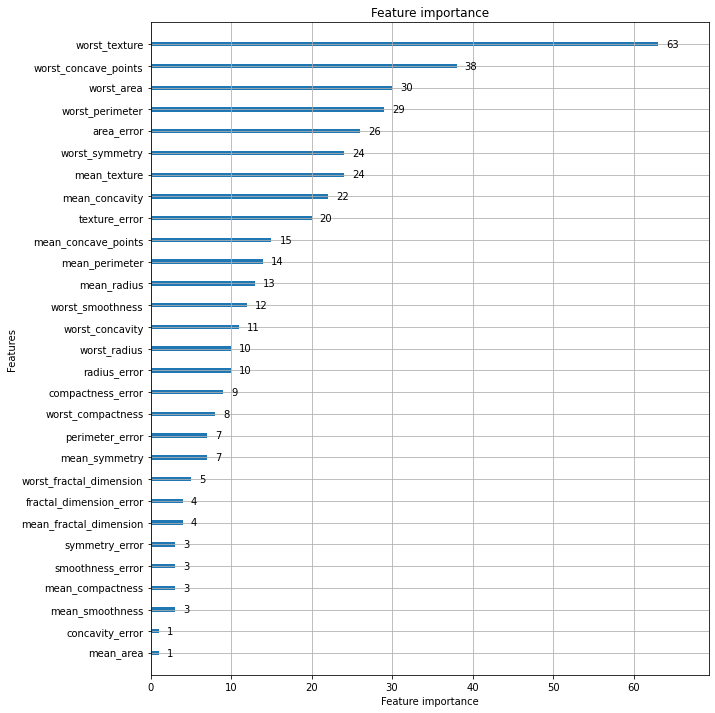

In [16]:
from lightgbm import plot_importance

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm, ax=ax);

#### Feature Selection With SHAP

In [18]:
# !pip install shap

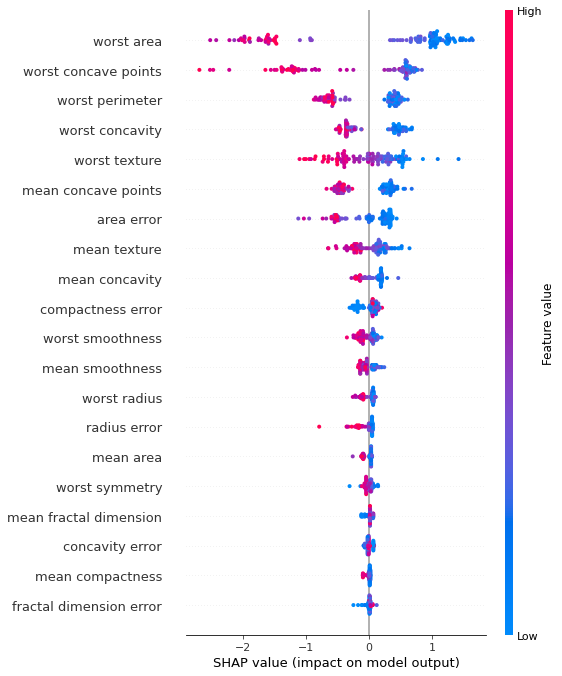

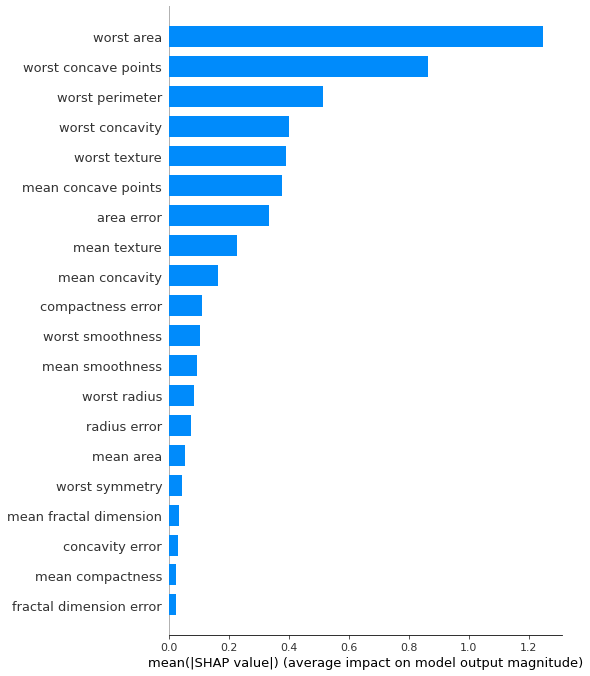

,column_name,shap_importance
23,worst area,1.247842
27,worst concave points,0.864163
22,worst perimeter,0.513194
26,worst concavity,0.400982
21,worst texture,0.38951
7,mean concave points,0.377377
13,area error,0.334621
1,mean texture,0.22796
6,mean concavity,0.162184
15,compactness error,0.108205


In [19]:
import shap

# DF, based on which importance is checked
X_importance = X_test

# Explain model predictions using shap library:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_importance)

# Plot summary_plot
shap.summary_plot(shap_values, X_importance)
# Plot summary_plot as barplot:
shap.summary_plot(shap_values, X_importance, plot_type='bar')

shap_sum = np.abs(shap_values).mean(axis=0)
importance_df = pd.DataFrame([X_importance.columns.tolist(), shap_sum.tolist()]).T
importance_df.columns = ['column_name', 'shap_importance']
importance_df = importance_df.sort_values('shap_importance', ascending=False)
importance_df

In [20]:
features_selected = importance_df.query('shap_importance>0.001').column_name
#features_selected = importance_df.query('shap_importance > 0').column_name
features_selected

23                 worst area
27       worst concave points
22            worst perimeter
26            worst concavity
21              worst texture
7         mean concave points
13                 area error
1                mean texture
6              mean concavity
15          compactness error
24           worst smoothness
4             mean smoothness
20               worst radius
10               radius error
3                   mean area
28             worst symmetry
9      mean fractal dimension
16            concavity error
5            mean compactness
19    fractal dimension error
25          worst compactness
12            perimeter error
29    worst fractal dimension
18             symmetry error
14           smoothness error
11              texture error
8               mean symmetry
0                 mean radius
2              mean perimeter
17       concave points error
Name: column_name, dtype: object

In [21]:
# 중요 Feature에 대한 상호작용 Feature 생성
from itertools import combinations

features_interact = importance_df.iloc[:3].column_name
for e, (x, y) in enumerate(combinations(features_interact,2)):
    X_train[f'inter_{e}*'] = X_train[x] * X_train[y]

X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,inter_0*,inter_1*,inter_2*
193,12.340,26.86,81.15,477.4,0.10340,0.13530,0.10850,0.045620,0.1943,0.06937,...,768.9,0.17850,0.4706,0.44250,0.14590,0.3215,0.12050,112.182510,78197.130,14.838030
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.021800,0.2341,0.06963,...,310.1,0.09836,0.1678,0.13970,0.05087,0.3282,0.08490,15.774787,20339.459,3.336563
41,10.950,21.35,71.90,371.1,0.12270,0.12180,0.10440,0.056690,0.1895,0.06870,...,514.0,0.19090,0.2698,0.40230,0.14240,0.2964,0.09606,73.193600,44831.080,12.420128
344,11.710,15.45,75.03,420.3,0.11500,0.07281,0.04006,0.032500,0.2009,0.06506,...,516.4,0.14600,0.1115,0.10870,0.07864,0.2765,0.07806,40.609696,43460.224,6.618342
536,14.270,22.55,93.77,629.8,0.10380,0.11540,0.14630,0.061390,0.1926,0.05982,...,728.3,0.13800,0.2733,0.42340,0.13620,0.2698,0.08351,99.194460,75961.690,14.205660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,19.680,21.68,129.90,1194.0,0.09797,0.13390,0.18630,0.110300,0.2082,0.05715,...,1540.0,0.12180,0.3458,0.47340,0.22550,0.4045,0.07918,347.270000,242704.000,35.538800
144,10.750,14.97,68.26,355.3,0.07793,0.05139,0.02251,0.007875,0.1399,0.05688,...,441.2,0.10760,0.1223,0.09755,0.03413,0.2300,0.06769,15.058156,34320.948,2.654973
26,14.580,21.53,97.41,644.8,0.10540,0.18680,0.14250,0.087830,0.2252,0.06924,...,896.9,0.15250,0.6643,0.55390,0.27010,0.4264,0.12750,242.252690,109780.560,33.060240
245,10.480,19.86,66.72,337.7,0.10700,0.05971,0.04831,0.030700,0.1737,0.06440,...,402.8,0.15150,0.1026,0.11810,0.06736,0.2883,0.07748,27.132608,29678.304,4.963085
